#第3章　代表的な次元削減を行う10本ノック

## ノック21:PCAを実施してみよう

![](2022-09-11-07-08-15.png)

分散共分散行列　データがよくばらついている方向に合わせて空間の軸を取り直す

In [20]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.loc[df["target"] == 0, "target_name"] = "setosa"
df.loc[df["target"] == 1, "target_name"] = "versicolor"
df.loc[df["target"] == 2, "target_name"] = "virginica"
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


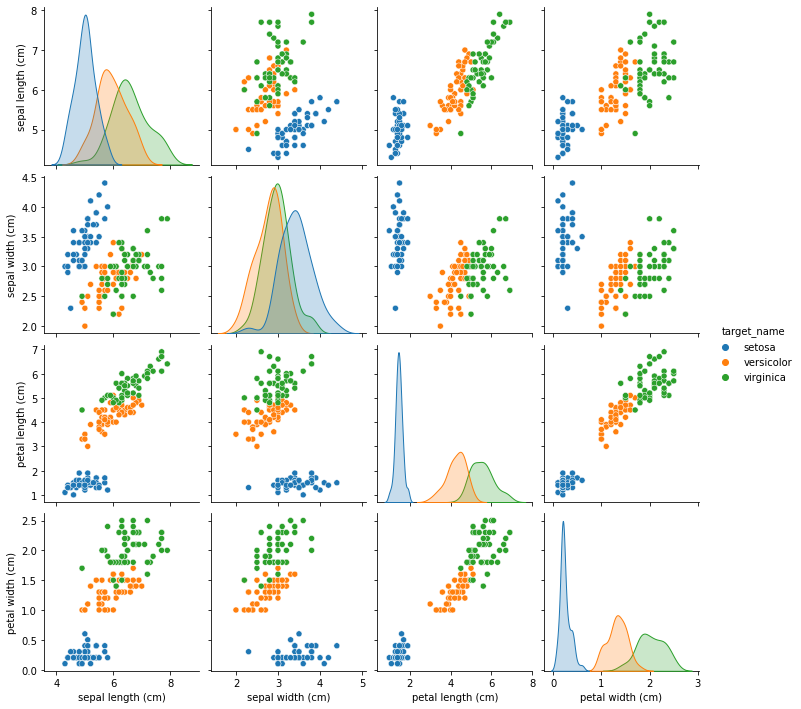

In [21]:
import seaborn as sns
sns.pairplot(df, vars=df.columns[:4], hue="target_name")


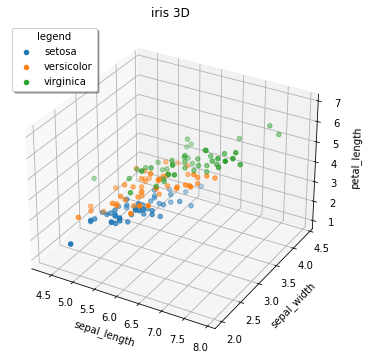

In [22]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection="3d")
for c in df["target_name"].unique():
    ax.scatter(df.iloc[:, 0][df["target_name"] == c], df.iloc[:, 1]
               [df["target_name"] == c], df.iloc[:, 2][df["target_name"] == c], label=c)
ax.set_title("iris 3D")
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")
ax.legend(loc=2, title="legend", shadow=True)
plt.show()


In [23]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(random_state=0)
X_pc = pca.fit_transform(df.iloc[:, 0:4])
df_pca = pd.DataFrame(
    X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_)
print("保たれている情報: ", np.sum(pca.explained_variance_ratio_))
display(df_pca.head())


主成分の数:  4
保たれている情報:  1.0


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

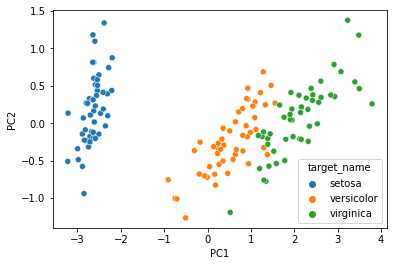

In [24]:
sns.scatterplot(x="PC1", y="PC2", data=df_pca, hue=df["target_name"])


## ノック22:主成分を解釈してみよう

## ノック23:スクリープロットで次元削減数を探索してみよう

## ノック24:寄与率で次元削減数を探索してみよう

## ノック25:Isomapで次元削減を実施してみよう

## ノック26:t-SNEで次元削減を実施してみよう

## ノック27:t-SNEで最適なPerplexityを探索してみよう

## ノック28:UMAPで次元削減を実施してみよう

## ノック29:UMAPで最適なn_neighborsを探索してみよう

## ノック30:PCAとUMAPを組み合わせて次元削減を実施してみよう